In [1]:
import pandas as pd 
import numpy as np
import collections as col
from pandas import Series ,DataFrame
import datetime as datetime
#from datetime import datetime
from time import strptime
import seaborn as sns 
import matplotlib.pyplot as plt

oil_df = pd.read_csv("Desktop/oildataRAW.csv", parse_dates=[3])
oil_df.head()
price_df = pd.read_csv("Desktop/price_per_barrel_01042010-01312017.csv", parse_dates=[0])


In [2]:
type(price_df.loc[2,'Day'])

pandas._libs.tslibs.timestamps.Timestamp

In [3]:
price_df.head(), oil_df.head()

(         Day  Cushing WTI Spot Price/Barrel
 0 2017-01-31                          52.75
 1 2017-01-30                          52.63
 2 2017-01-27                          53.18
 3 2017-01-26                          53.24
 4 2017-01-25                          52.14,
    Report Number  Supplemental Number  Accident Year  Accident Date/Time  \
 0       20100016                17305           2010 2010-01-01 07:15:00   
 1       20100254                17331           2010 2010-01-04 08:30:00   
 2       20100038                17747           2010 2010-01-05 10:30:00   
 3       20100260                18574           2010 2010-01-06 19:30:00   
 4       20100030                16276           2010 2010-01-07 13:00:00   
 
    Operator ID                         Operator Name Pipeline/Facility Name  \
 0        32109                 ONEOK NGL PIPELINE LP      KINDER MORGAN JCT   
 1        15786                PORTLAND PIPELINE CORP      24-INCH MAIN LINE   
 2        20160          

In [4]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null datetime64[ns]
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                      

In [5]:
df_byCost = oil_df.sort_values(by=['All Costs'], ascending=False)
info = ['Accident Year','Operator Name','Accident City', 'Accident State', 'Cause Category'
       ,'Cause Subcategory','All Costs']
df_byCost[info].head()

,Accident Year,Operator Name,Accident City,Accident State,Cause Category,Cause Subcategory,All Costs
194,2010,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",MARSHALL,MI,MATERIAL/WELD/EQUIP FAILURE,ENVIRONMENTAL CRACKING-RELATED,840526118
2103,2015,"PLAINS PIPELINE, L.P.",GOLETA,CA,CORROSION,EXTERNAL,142931884
523,2011,EXXONMOBIL PIPELINE CO,LAUREL,MT,NATURAL FORCE DAMAGE,HEAVY RAINS/FLOODS,135000000
1173,2013,MOBIL PIPE LINE COMPANY,MAYFLOWER,AR,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,91300000
2675,2016,COLONIAL PIPELINE CO,HELENA,AL,ALL OTHER CAUSES,UNKNOWN,66234072


In [6]:
#MOST COMMON "SPILLERS"
most_common = col.Counter(oil_df["Operator ID"].values)
ids = [x[0] for x in most_common.most_common(20)]

hXvalue = []
hvalues = []
hlabels = []

for j,i in enumerate(ids):
    hXvalue.append(j+1)
    hvalues.append(most_common[i])
    hlabels.append(" or ".join(oil_df['Operator Name'].loc[oil_df['Operator ID'] == i].unique()))

hlabels,hvalues


(['TEPPCO CRUDE PIPELINE, LLC or ENTERPRISE CRUDE PIPELINE LLC',
  'SUNOCO PIPELINE L.P.',
  'PLAINS PIPELINE, L.P.',
  'ENTERPRISE PRODUCTS OPERATING LLC',
  'MAGELLAN PIPELINE COMPANY, LP',
  'COLONIAL PIPELINE CO',
  'BUCKEYE PARTNERS, LP',
  'CONOCOPHILLIPS or PHILLIPS 66 PIPELINE LLC',
  'KINDER MORGAN LIQUID TERMINALS, LLC',
  'MARATHON PIPE LINE LLC',
  'ONEOK NGL PIPELINE LP or ONEOK NGL PIPELINE, LLC',
  'ENBRIDGE ENERGY, LIMITED PARTNERSHIP',
  'SHELL PIPELINE CO., L.P.',
  'EXXONMOBIL PIPELINE CO',
  'EXPLORER PIPELINE CO',
  'MAGELLAN AMMONIA PIPELINE, L.P.',
  'KOCH PIPELINE COMPANY, L.P.',
  'CHEVRON PIPE LINE CO',
  'NUSTAR PIPELINE OPERATING PARTNERSHIP L.P.',
  'PLANTATION PIPE LINE CO'],
 [201,
  180,
  156,
  155,
  140,
  136,
  115,
  114,
  87,
  87,
  75,
  71,
  60,
  47,
  42,
  37,
  36,
  34,
  33,
  32])

In [7]:
#MOST COMMON SPILL CAUSES
spill_causes = col.Counter(oil_df["Cause Category"].values)
ids2 = [x[0] for x in spill_causes.most_common(10)]
hXvalue2 = []
hvalues2 = []
hlabels2 = []

for j,i in enumerate(ids2):
    hXvalue2.append(j+1)
    hvalues2.append(spill_causes[i])
    hlabels2.append(i)

hlabels2, hvalues2


(['MATERIAL/WELD/EQUIP FAILURE',
  'CORROSION',
  'INCORRECT OPERATION',
  'NATURAL FORCE DAMAGE',
  'ALL OTHER CAUSES',
  'EXCAVATION DAMAGE',
  'OTHER OUTSIDE FORCE DAMAGE'],
 [1435, 592, 378, 118, 118, 97, 57])

In [8]:
spills_per_state_percentage = oil_df["Accident State"].value_counts(normalize=True).sort_values(ascending=False);
spills_per_state_number = oil_df["Accident State"].value_counts()
spills_per_state_percentage
spills_per_state_number


TX    1004
OK     236
LA     169
CA     153
KS     150
IL     108
WY      98
NJ      85
MN      59
IN      57
NM      57
OH      53
ND      49
IA      46
PA      45
MO      42
MS      32
MT      30
MI      29
WI      27
CO      24
NE      22
AL      21
VA      20
GA      17
SC      16
NC      15
KY      14
NY      14
AR      13
AK      11
SD       9
MD       8
UT       8
WA       8
FL       7
TN       7
OR       4
ID       4
HI       3
WV       2
CT       2
MA       2
ME       1
NV       1
PR       1
Name: Accident State, dtype: int64

In [9]:
property_damage = oil_df.groupby("Accident State")["Property Damage Costs"].sum().sort_values(ascending=False)
property_damage

Accident State
TX    57246318.0
LA    53402564.0
AK    44156471.0
CA    20376668.0
IN    15902914.0
IL    14927457.0
WI    14653046.0
OK    10212737.0
MT     9145728.0
IA     8660767.0
OH     6028545.0
MI     5120508.0
MN     4609727.0
PA     4151833.0
KS     3526302.0
WV     3321591.0
NJ     3185475.0
ND     2782208.0
AL     2642900.0
NY     2599716.0
AR     2334549.0
VA     2005511.0
NC     1888256.0
NM     1697794.0
SD     1603227.0
CO     1510180.0
NE     1353342.0
WY     1120080.0
SC     1064980.0
UT     1030415.0
MS      901866.0
GA      615556.0
MO      523819.0
FL      435750.0
TN      369700.0
KY      258099.0
MA      192500.0
ID      179506.0
WA      152581.0
MD      142893.0
PR       90005.0
OR       81344.0
CT       35000.0
HI       14200.0
NV       14000.0
ME        4000.0
Name: Property Damage Costs, dtype: float64

In [10]:
accident_causes = oil_df.groupby("Accident State")["Cause Subcategory"].value_counts()
accident_causes["HI"]

Cause Subcategory
EXTERNAL                                2
THREADED CONNECTION/COUPLING FAILURE    1
Name: Cause Subcategory, dtype: int64

In [11]:
liquid_type = oil_df["Liquid Type"].value_counts()
liquid_type

CRUDE OIL                                               1398
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       939
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               418
CO2 (CARBON DIOXIDE)                                      38
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)       2
Name: Liquid Type, dtype: int64

In [12]:
location = oil_df["Pipeline Location"].value_counts()
location

ONSHORE     2777
OFFSHORE      18
Name: Pipeline Location, dtype: int64

In [13]:
pipeline_type = oil_df["Pipeline Type"].value_counts()
pipeline_type

ABOVEGROUND        1475
UNDERGROUND         985
TANK                301
TRANSITION AREA      16
Name: Pipeline Type, dtype: int64

In [14]:
#looking at relationship between price per barrel and average number of accidents
price_df.head()
price_df.columns = ["Day", "WTI"]
price_df.head()
price_df["WTI"].describe()
price_df.head()


,Day,WTI
0,2017-01-31,52.75
1,2017-01-30,52.63
2,2017-01-27,53.18
3,2017-01-26,53.24
4,2017-01-25,52.14


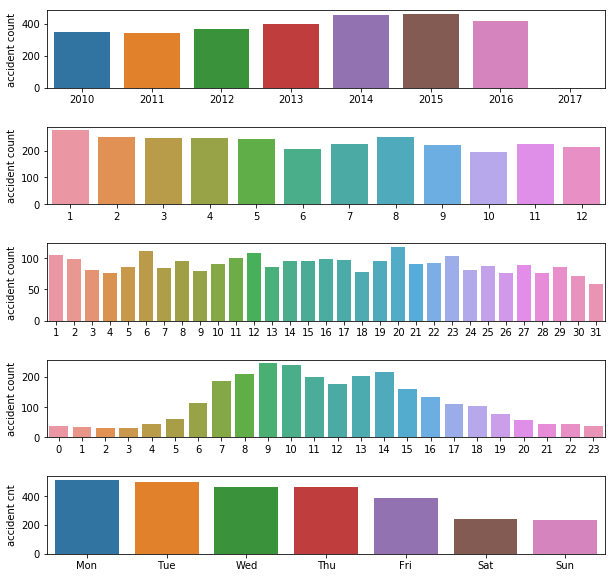

In [15]:
def Weekday(date):
    wday_dum = date.weekday()
    if wday_dum is 0:
        wday = 'Mon'
    elif wday_dum is 1:
        wday = 'Tue'
    elif wday_dum is 2:
        wday = 'Wed'
    elif wday_dum is 3:
        wday = 'Thu'
    elif wday_dum is 4:
        wday = 'Fri'
    elif wday_dum is 5:
        wday = 'Sat'
    else:
        wday = 'Sun'
    return wday

Hour = lambda x: x.hour
Day = lambda x: x.day
Month = lambda x: x.month
Year = lambda x: x.year

oil_df['weekday'] = oil_df.loc[:, "Accident Date/Time"].apply(lambda x: Weekday(x))

cat = [Year,Month,Day,Hour]
num = len(cat)
plt.figure(figsize=(10,10))
for (i, c) in enumerate(cat):
    plt.subplot(num+1,1,i+1)
    sns.countplot(oil_df["Accident Date/Time"].apply(c))
    plt.xlabel('')
    plt.ylabel('accident count')

plt.subplot(num+1,1,5)
sns.countplot(oil_df["Accident Date/Time"].apply(Weekday),order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('')
plt.ylabel('accident cnt')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0.5)

In [17]:
price_df.columns = ['Day', 'Cushing']
def myDate (date):
    time_format = '%m/%d/%Y'
    date_obj = datetime.datetime.strptime(date, time_format)
    return date_obj
price_df['Day_obj'] = price_df['Day'].apply(myDate)

TypeError: strptime() argument 1 must be str, not Timestamp